In [13]:
data cancer;
input time volume;
datalines;
0 5.3
0 5.19
7 2.87
7 3.15
7 2.74
10 2.65
10 2.13
10 2.51
14 2.31
14 2.11
14 2.50
21 1.41
21 0.98
21 1.26
28 1.30
28 1.00
28 1.13
;
run;


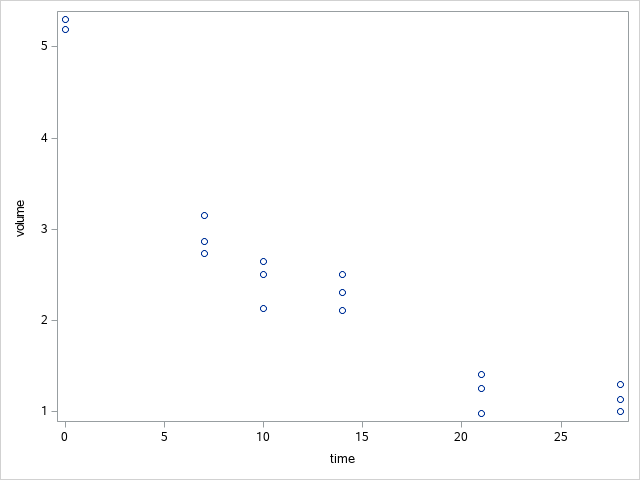

In [12]:
proc sgplot data=cancer;
scatter x=time y=volume;
run;


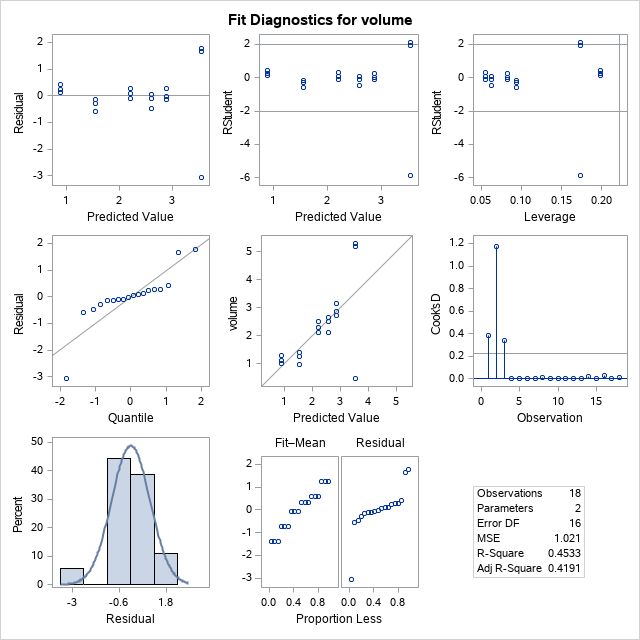
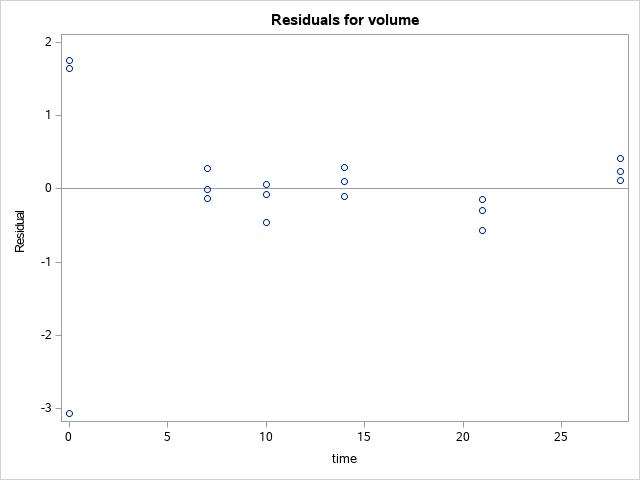
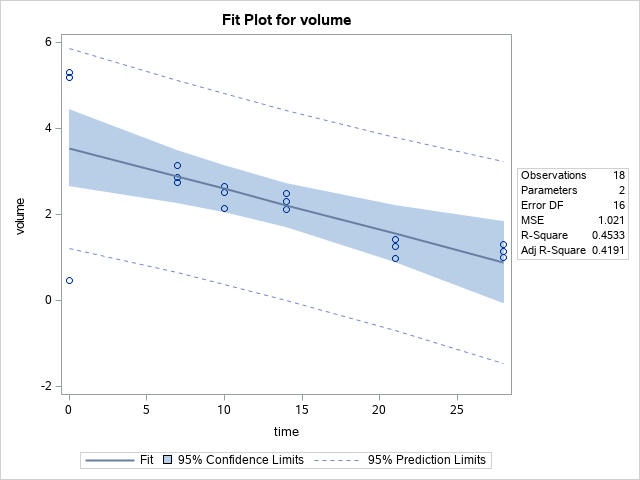

In [3]:
proc reg data=cancer;
model volume=time;
run;

In [19]:
data cancer2;
set cancer;
time2=sqrt(time);
run;


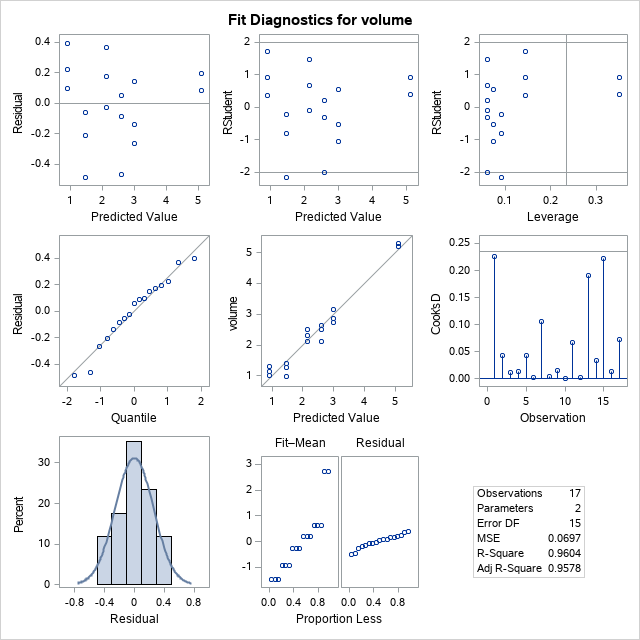
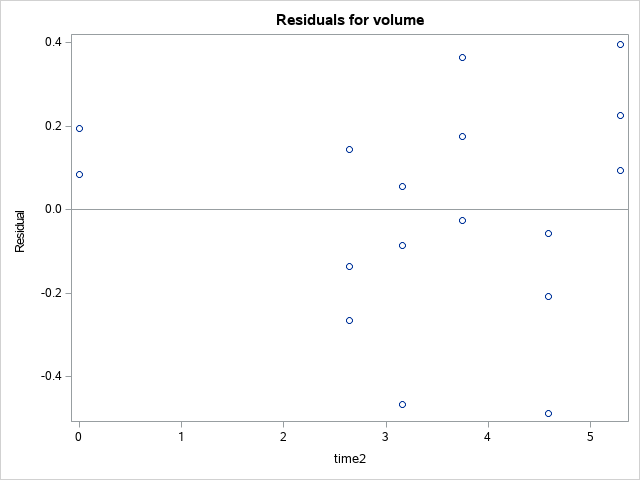
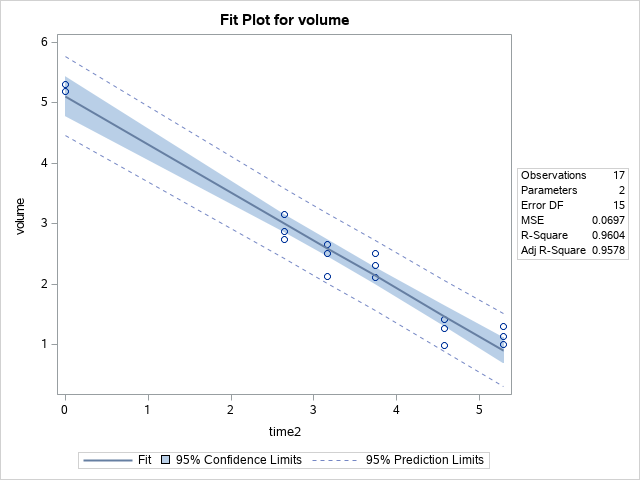

In [24]:
proc reg data=cancer2;
model volume=time2 /lackfit clb cli;
run;


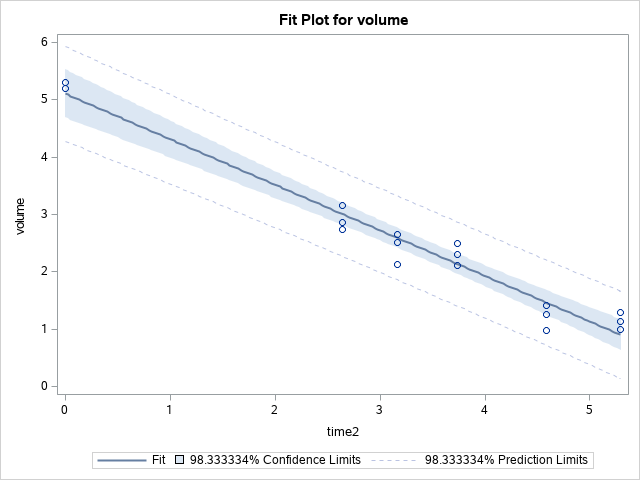

In [27]:
proc glm data=cancer2 alpha=.01666666;
model volume = time2 /clparm;
estimate 'At 10 days' intercept 1 time2 3.162278;
estimate 'At 14 days' intercept 1 time2 3.741657;
estimate 'At 21 days' intercept 1 time2 4.582576;
run;


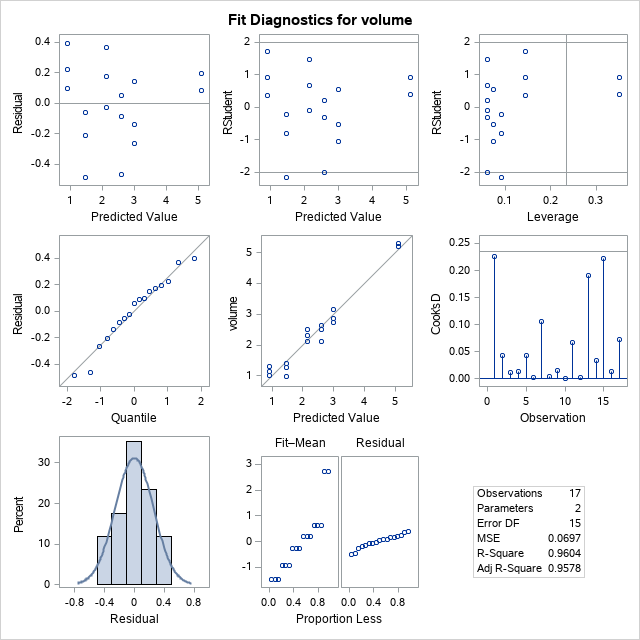
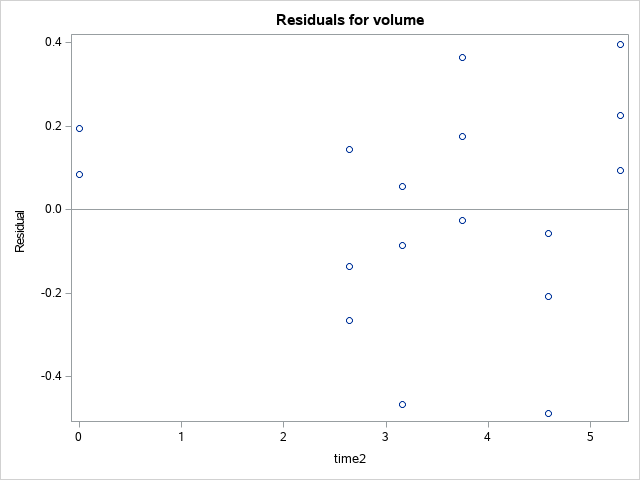
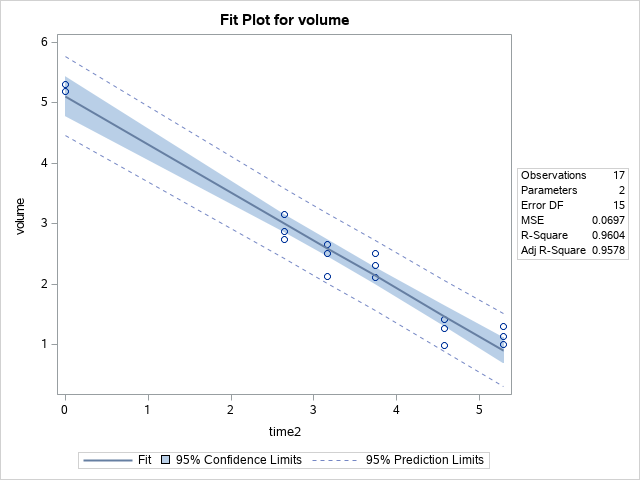

In [28]:
/*	IV) Bonferrroni and Scheffe simultaneous ci for prediction
/*
/****************************************************************************************/
proc reg data=cancer2;
  model volume=time2;
  output out=ExtPred p=HatY stdp=sp;
run;
data PredInters;
  set ExtPred;
  /**/
  fvalue=finv(0.95,3,15);
  W=sqrt(3*fvalue);
  LowSCH= HatY - W*sp;
  HighSCH = HatY + W*sp;
  /**/
  tvalue=tinv(0.99166666,15);
  LowBF = HatY - tvalue*sp;
  HighBF = HatY+tvalue*sp;
  if steam ne . then delete;
  keep time2 HatY LowSCH HighSCH LowBF HighBF;
run;
proc print data=PredInters;
run;

In [30]:
data pg; /* Creates the file `pg_steam.sas' in the library `stat2131'*/
input seq month steam fat glycerin;  /* The variables we are creating */	
datalines;
1 1 10.98 5.20 0.61
2 2 11.13 5.12 0.64
3 3 12.51 6.19 0.78
4 4 8.40 3.89 0.49
5 5 9.27 6.28 0.84
6 6 8.73 5.76 0.74
7 7 6.36 3.45 0.42
8 8 8.50 6.57 0.87
9 9 7.82 5.69 0.75
10 10 9.14 6.14 0.76
11 11 8.24 4.84 0.65
12 12 12.19 4.88 0.62
13 1 11.88 6.03 0.79
14 2 9.57 4.55 0.60
15 3 10.94 5.71 0.70
16 4 9.58 5.67 0.74
17 5 10.09 6.72 0.85
18 6 8.11 4.95 0.67
19 7 6.83 4.62 0.45
20 8 8.88 6.60 0.95
21 9 7.68 5.01 0.64
22 10 8.47 5.68 0.75
23 11 8.86 5.28 0.70
24 12 10.36 5.36 0.67
25 1 11.08 5.87 0.70
;
;
run;


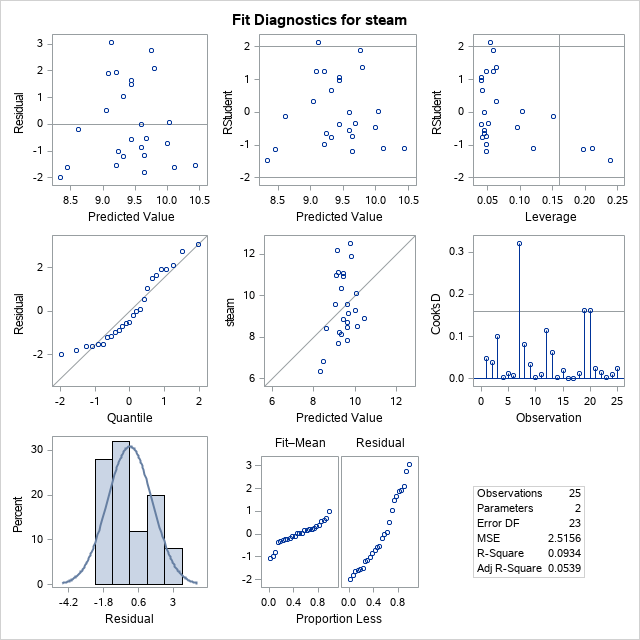
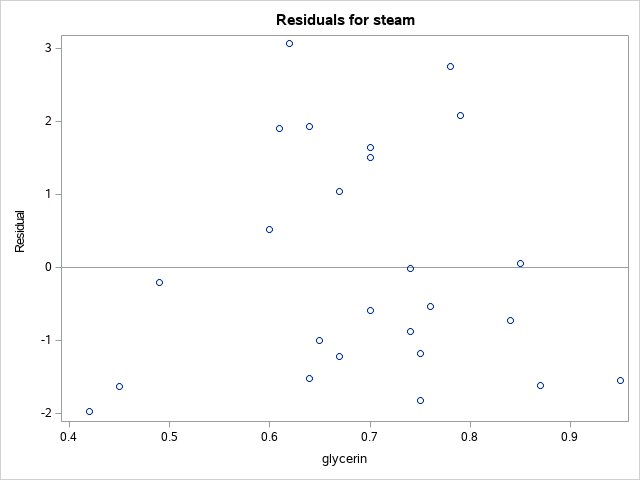
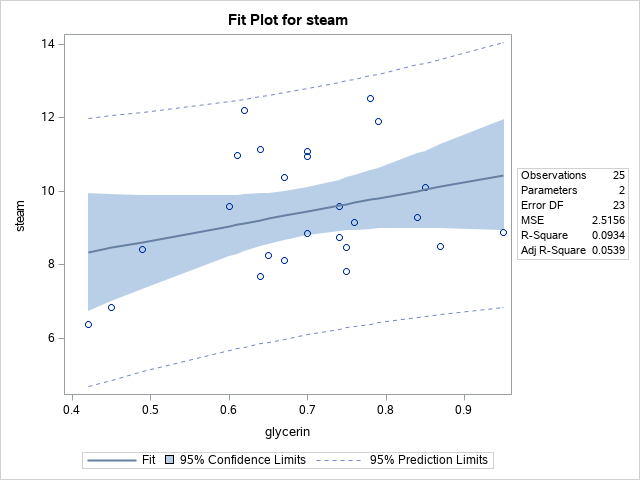

In [32]:
ods html file="hw3-5.html";
proc reg data=pg;
model steam=glycerin;
run;

In [35]:
proc means data=pg;
var steam;
run;


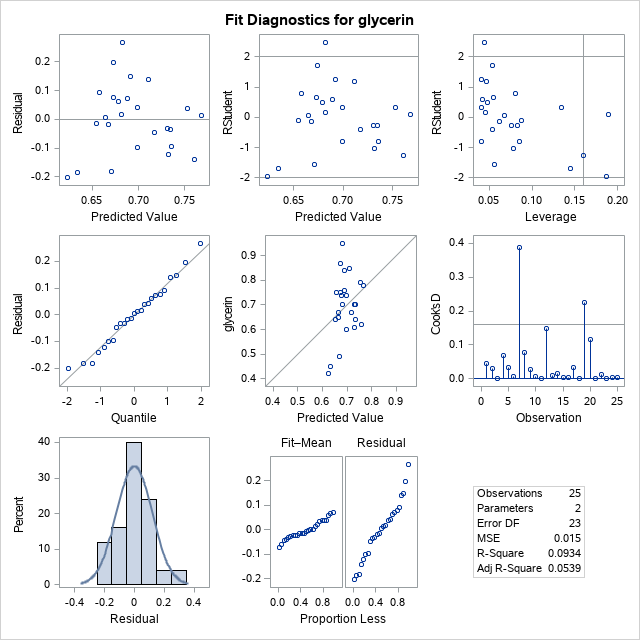
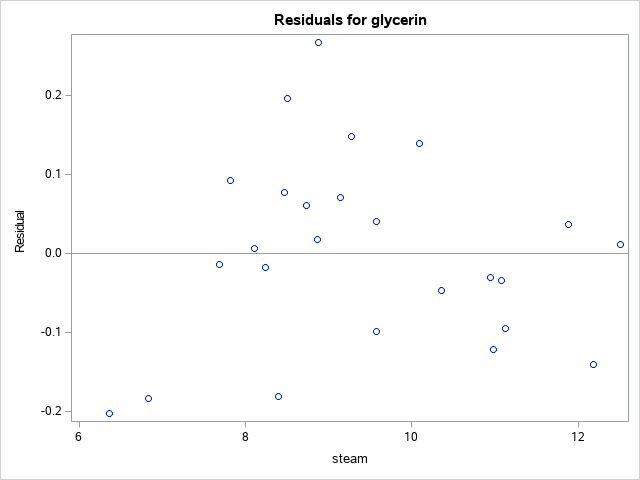
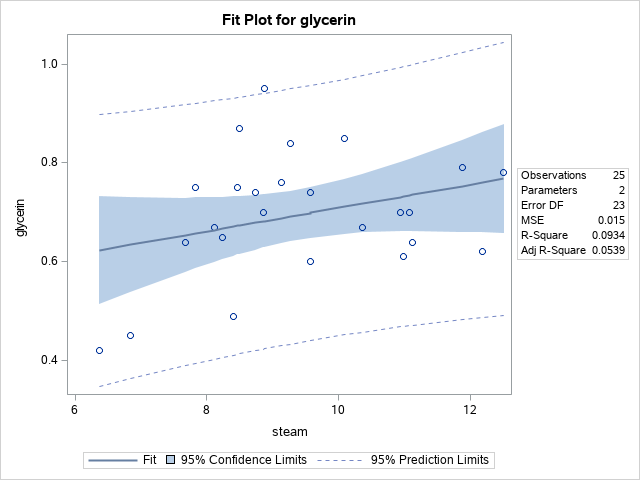

In [34]:
ods html file="hw3-5-b.html";
proc reg data=pg;
model glycerin=steam;
run;